# lending club case study

# Import necessory packages

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [122]:
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1. Data Understanding

In [123]:
# check no of rows and columns 
df.shape

(39717, 111)

## 2. Data Cleaning

In [124]:
# check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [125]:
#find out percentage of missing values in each columns
missing_value_percentage = df.isnull().sum()*100/len(df)
missing_value_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [126]:
# print result in descending order
result_desc_order = missing_value_percentage
result_desc_order = result_desc_order.sort_values(ascending=False)
result_desc_order

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [127]:
# before removing null values
df.shape

(39717, 111)

In [128]:
# create backup of main df
backup_df=df

In [129]:
# select the dataframe which have less than 30% missing columns values 
df_clean=df.loc[:,missing_value_percentage<30]
# after removing missing value columns
df_clean.shape 

(39717, 53)

In [130]:
df_clean.isnull().sum()*100/len(df) # check missing on df_clean

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [131]:
#find out same/unique value in all the columns
unique_value_columns = df_clean.nunique().sort_values()
unique_value_columns

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [132]:
# dropping unique column count value is 1 across the column data
unique_one_col_list = list(df_clean.columns[df_clean.nunique() == 1])
print("unique only one values present column names are ",unique_one_col_list)
df_clean.drop(unique_one_col_list, axis=1, inplace=True)

unique only one values present column names are  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [133]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [134]:
df_clean.shape

(39717, 44)

In [135]:
# dropping the columns does not seems to be helful.
df_clean.drop(['delinq_2yrs', 
         'earliest_cr_line', 
         'inq_last_6mths',
         'open_acc',
         'pub_rec', 
         'revol_bal',
         'revol_util',
         'total_acc',
         'out_prncp',
         'out_prncp_inv', 
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int', 
         'total_rec_late_fee', 
         'recoveries',
         'collection_recovery_fee',
         'last_pymnt_d', 
         'last_pymnt_amnt',
         'last_credit_pull_d'], axis=1, inplace=True)

In [136]:
df_clean.shape

(39717, 24)

In [137]:
# those are haiving loan status doesnot affect result hence remove that rows 
df_clean = df_clean[df_clean["loan_status"] != "Current"]

In [138]:
df_clean.shape

(38577, 24)

In [139]:
# verify percentage of null values for all columns 
null_col_percent = (df_clean.isna().sum()/len(df_clean.index)) * 100
null_col_percent

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
url                     0.000000
purpose                 0.000000
title                   0.028514
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [140]:
# fill the missing vaulues with 0 for emp_length,pub_rec_bankruptcies
df_clean["emp_length"].fillna(0, inplace=True)
df_clean["pub_rec_bankruptcies"].fillna(0, inplace=True)

In [141]:
# drop the columns where having text values and not relenvant for analysis
df_clean.drop(["id","member_id","title","url","sub_grade","emp_title"], axis=1, inplace=True)

In [142]:
df_clean.shape

(38577, 18)

In [143]:
# verify percentage of null values for all columns 
null_col_percent = (df_clean.isna().sum()/len(df_clean.index)) * 100
null_col_percent

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

 # # Data Cleaning Done !!!

## 3. Data Manipulation

In [144]:
# need data conversion for columns term,int_rate,issue_d

In [145]:
#Stripping empty space in values in term
df_clean['term'] = df_clean["term"].str.strip()
df_clean["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [146]:
# Convert the term column into an integer from a string
df_clean['term'] = df_clean['term'].apply(lambda x : int(x[:-7]))

In [147]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [148]:
# Convert int_rate to  float by removing the "%" character
df_clean['int_rate'] = df_clean['int_rate'].apply(lambda x : float(x[:-1]))

In [149]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [150]:
# Converting the column issue_d from string object to DateTime
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%b-%y')

In [151]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [152]:
# Mapping for employee length to number
def emp_len_to_num(emp_len):
    emp_len_map = {
        "10+ years": 10,
        "< 1 year": 0,
        "1 year": 1,
        "2 years": 2,
        "3 years": 3,
        "4 years": 4,
        "5 years": 5,
        "6 years": 6,
        "7 years": 7,
        "8 years": 8,
        "9 years": 9
    }
    return emp_len_map.get(emp_len, 0)

# Mapping for debt to income ratio brackets
def debt_to_inc_ratio_to_bracket(dti):
    brackets = {
        (0, 5): "0-5",
        (5, 10): "5-10",
        (10, 15): "10-15",
        (15, 20): "15-20",
        (20, 25): "20-25",
        (25, 30): "25-30"
    }
    for (lower, upper), label in brackets.items():
        if lower <= dti <= upper:
            return label
    return None

# Bucketting months to quarters
def bucket_issue_month(month):
    quarters = {
        (1, 3): 'Q1',
        (4, 6): 'Q2',
        (7, 9): 'Q3',
        (10, 12): 'Q4'
    }
    for (start, end), quarter in quarters.items():
        if start <= month <= end:
            return quarter
    return None

# Generalized function for bucketing
def bucket_value(value, buckets):
    for (lower, upper), label in buckets.items():
        if lower <= value <= upper:
            return label
    return None

# Loan amount groups
def loan_amnt_groups(amount):
    loan_buckets = {
        (0, 5000): '0 - 5K',
        (5001, 10000): '5K - 10K',
        (10001, 15000): '10K - 15K',
        (15001, float('inf')): '15K - above'
    }
    return bucket_value(amount, loan_buckets)

# Funded amount groups
def funded_amnt_inv_group(amount):
    return loan_amnt_groups(amount)  # Reuse the same logic as loan_amnt_groups

# Interest rate groups
def int_rate_groups(rate):
    int_rate_buckets = {
        (0, 9): 'Very Low',
        (9.01, 11): 'Low',
        (11.01, 13): 'Moderate',
        (13.01, 15): 'High',
        (15.01, float('inf')): 'Very High'
    }
    return bucket_value(rate, int_rate_buckets)

# Installment groups
def installment_groups(installment):
    installment_buckets = {
        (0, 150): '0-150',
        (150.01, 300): '150-300',
        (300.01, 450): '300-450',
        (450.01, float('inf')): '450-Above'
    }
    return bucket_value(installment, installment_buckets)

In [153]:
df_clean["emp_length"] = df_clean["emp_length"].apply(emp_len_to_num)

df_clean["emp_length"] = df_clean["emp_length"].astype(int)

In [154]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


## Derived Columns

In [155]:
df_clean['issue_y'] = df_clean['issue_d'].dt.year
df_clean['issue_m'] = df_clean['issue_d'].dt.month

income_brackets = [
    (0, 20000, "0-20K"),
    (20001,40000, "20-40K"),
    (40001, 60000, "40-60K"),
    (60001, 80000, "60-80K"),
    (80001, 100000, "80-1Lacks"),
    (100001, 6000000, "Above 1Lacks")]


# Function to assign income bracket
def categorize_income_with_loop(income):
    for bracket in income_brackets:
        if bracket[0] <= income <= bracket[1]:
            return bracket[2]
    return 'Unknown'  # For any income outside the defined ranges

# Create the new column 'income_bracket'
df_clean['income_bracket'] = df_clean['annual_inc'].apply(categorize_income_with_loop)

df_clean['issue_q'] = df_clean.apply(lambda x : bucket_issue_month(x['issue_m']), axis = 1)

df_clean['loan_amnt_bracket'] = df_clean.apply(lambda x : loan_amnt_groups(x['loan_amnt']), axis = 1)

    
df_clean['funded_amnt_inv_bracket'] = df_clean.apply(lambda x : funded_amnt_inv_group(x['funded_amnt_inv']), axis = 1)

df_clean['int_rate_bracket'] = df_clean.apply(lambda x : int_rate_groups(x.int_rate), axis = 1)

df_clean['installment_bracket'] = df_clean.apply(lambda x : installment_groups(x.installment), axis = 1)

In [156]:
df_clean.shape
backup_df=df_clean

In [157]:
df_clean["term"].unique()

array([36, 60])

In [158]:
numeric_columns = []
for col in df_clean.columns:
    if df_clean[col].dtype!= "object":
       numeric_columns.append(col)

In [159]:


# Displaying the numeric columns
#print(numeric_columns)
numeric_columns.remove("issue_y")
numeric_columns.remove("issue_m")
numeric_columns.remove("pub_rec_bankruptcies")
numeric_columns.remove("term")
# Displaying the numeric columns
print(numeric_columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti']


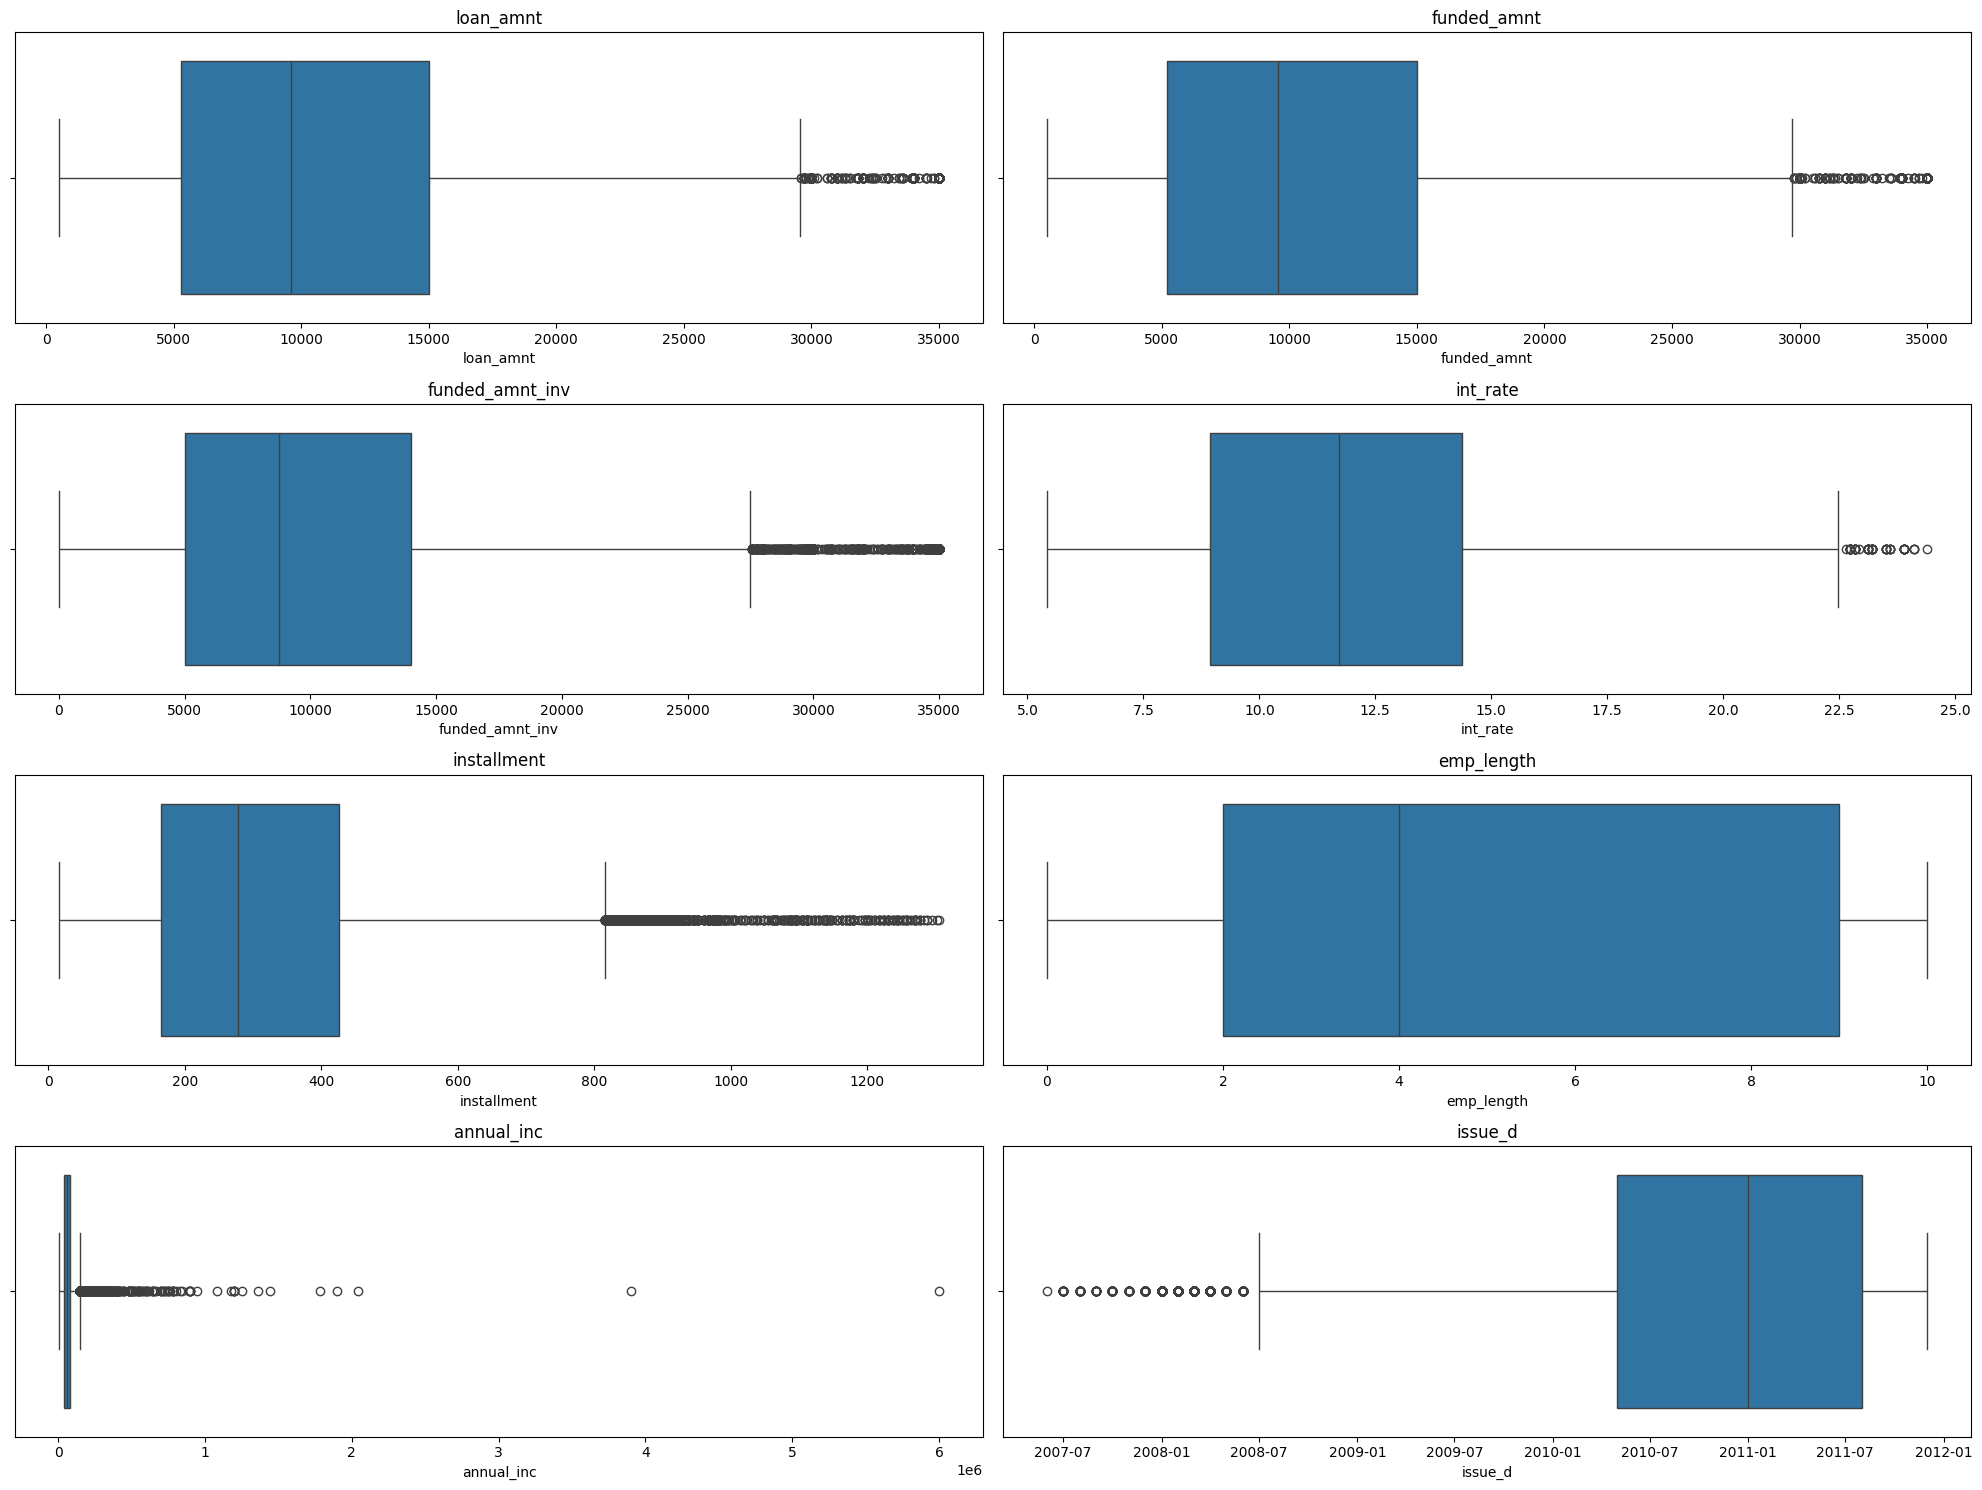

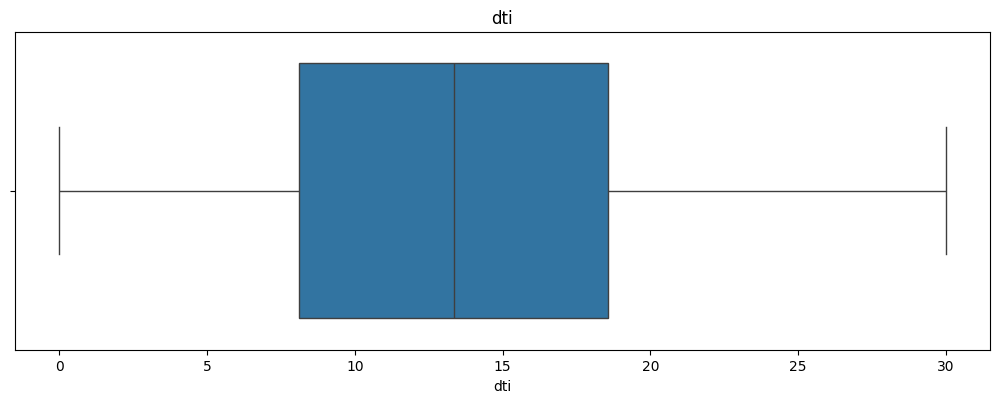

In [160]:
# Perform outlyer analysis in number columns
def check_outlier():
        
    # Assuming num_col is a list of column names and df is your dataframe
    i = 1  # Number of rows for subplots
    j = 1  # Current subplot number
    fig = plt.figure(figsize=(20, 15))  # Create a figure with appropriate size
    
    for col in numeric_columns:
        try:
            plt.subplot(4, 2, j)  # Create subplots in a grid of 4 rows, 2 columns
            sns.boxplot(x=df_clean[col])
            plt.title(col)  # Add title to each subplot
            j = j + 1
            
            # When j exceeds the available subplot positions (8), show the plot and reset
            if j > 8:
                plt.tight_layout()
                plt.show()
                fig = plt.figure(figsize=(20, 15))  # Create a new figure for the next set
                j = 1  # Reset subplot index
        except:
            print("Error for column", col)
    
    # Show the last set of plots
    if j != 1:
        plt.tight_layout()
        plt.show()

check_outlier()

In [161]:
df_clean.shape

(38577, 26)

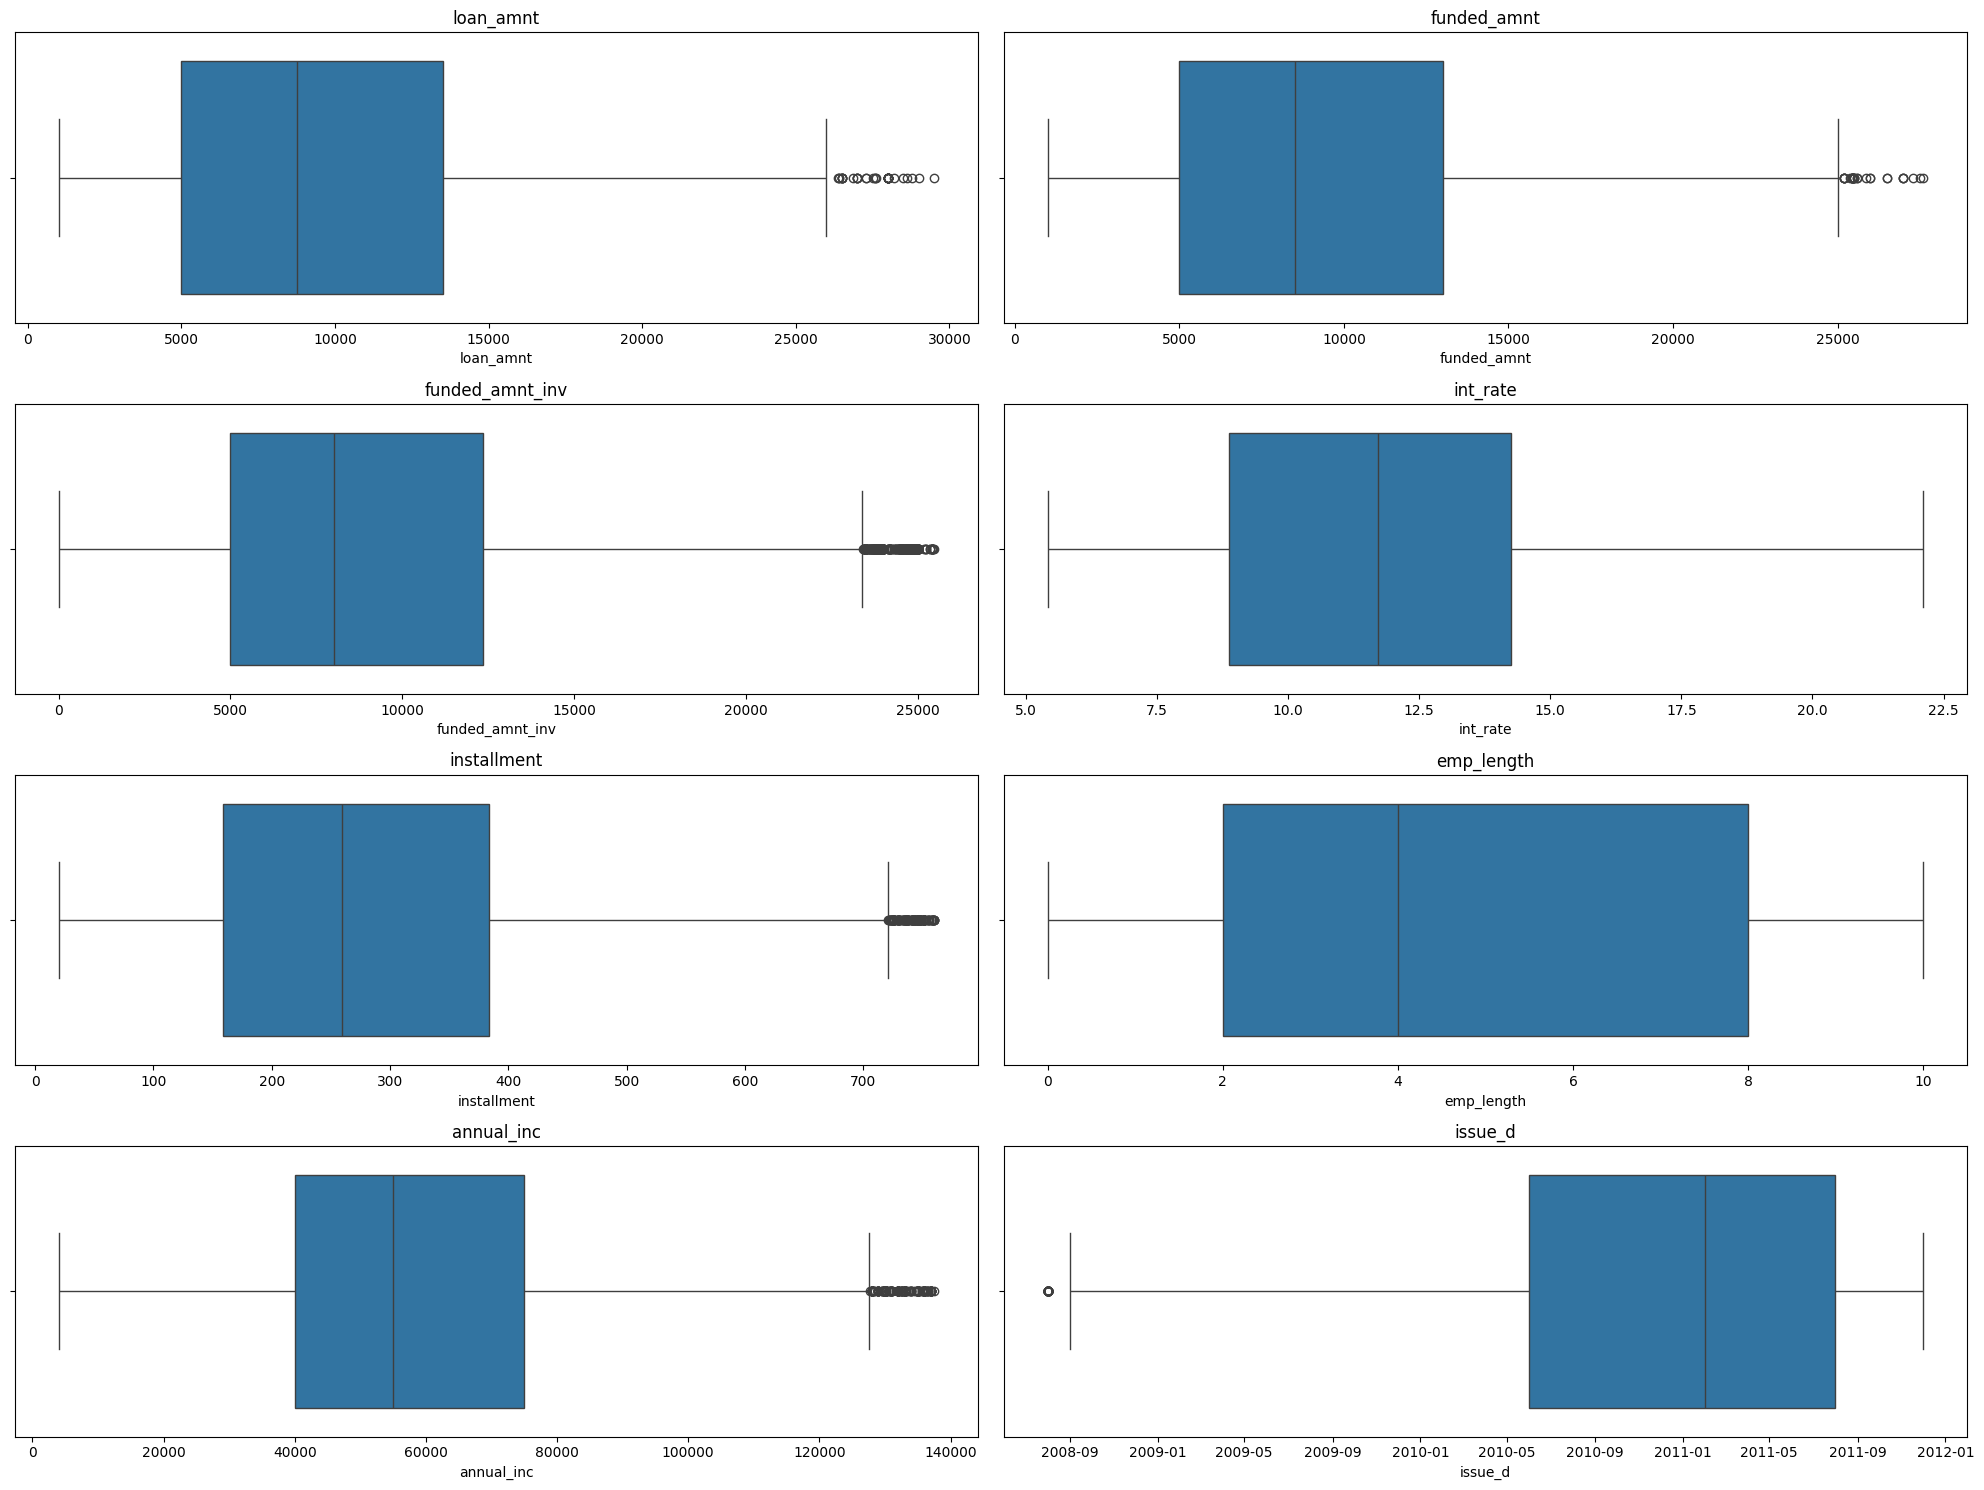

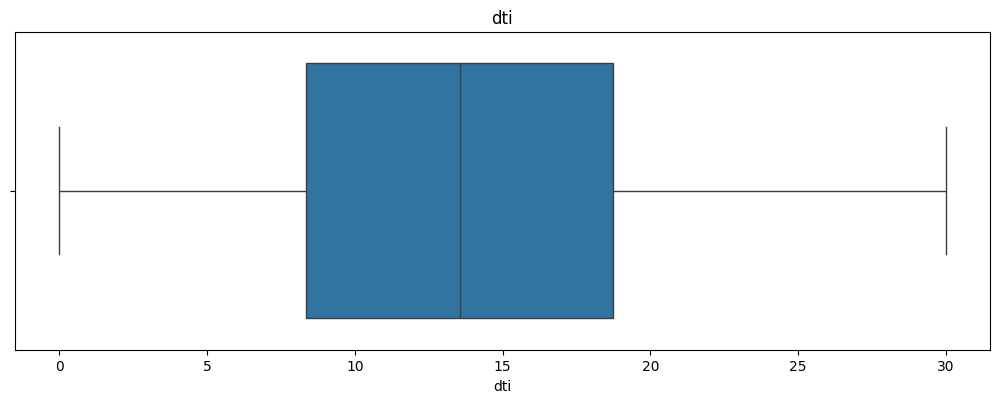

In [162]:
# remove the outliers from number columns using IQR technique 
for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= low_whisker) & (df_clean[col] <= upper_whisker)]


check_outlier()

In [163]:
df_clean.shape

(33463, 26)

In [164]:
df_clean["term"].unique()

array([36, 60])

# Univariate Analysis

In [165]:
palette = sns.color_palette("coolwarm", n_colors=15)  # Choose a color palette

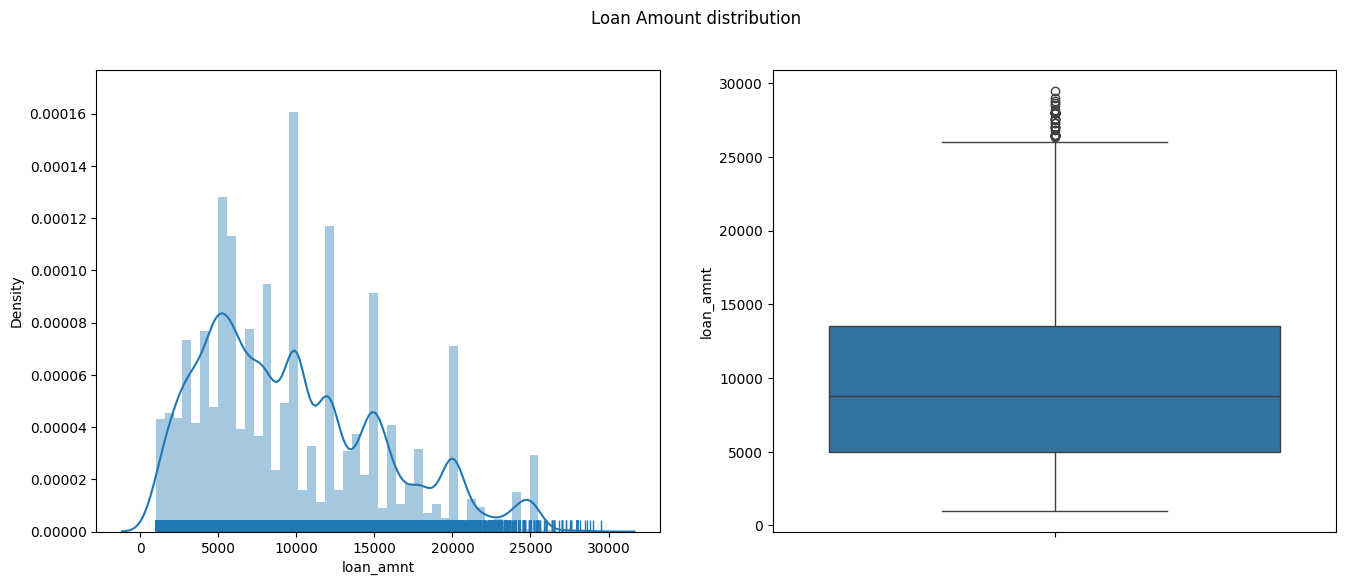

In [166]:
plt.figure(figsize=(16,6))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_clean.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df_clean.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()


The range of loan amount is 500 to 35000. Most of the loan_amount is in the range of 5K to 14K

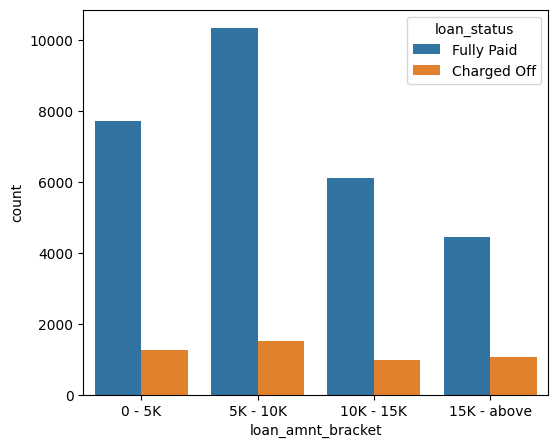

In [167]:
plt.figure(figsize=(6,5))
l = sns.countplot(x = 'loan_amnt_bracket', data = df_clean, hue = "loan_status")
# l.set_title("loan amount wise defaulters Applicants")
plt.show()

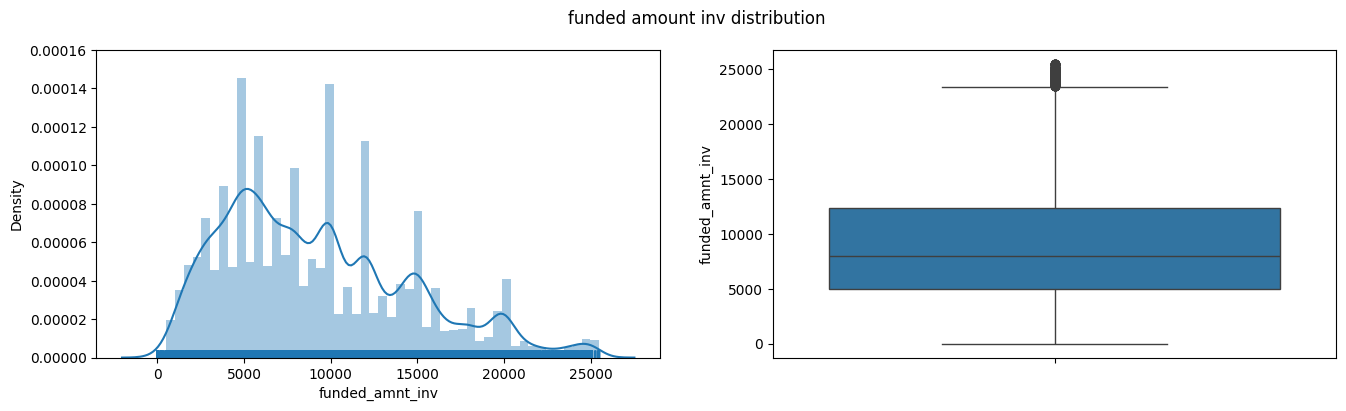

In [168]:
plt.figure(figsize=(16,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_clean.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df_clean.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('funded amount inv distribution')
plt.show()

#The range of funded amount inv is 0 to 35000. Most of the funded amount inv is in the range of 5K to 13K

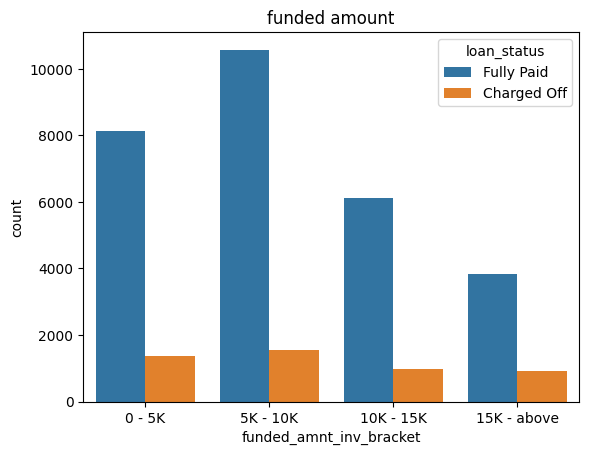

In [169]:
l = sns.countplot(x = 'funded_amnt_inv_bracket', data = df_clean, hue = "loan_status")
l.set_title("funded amount")
plt.show()

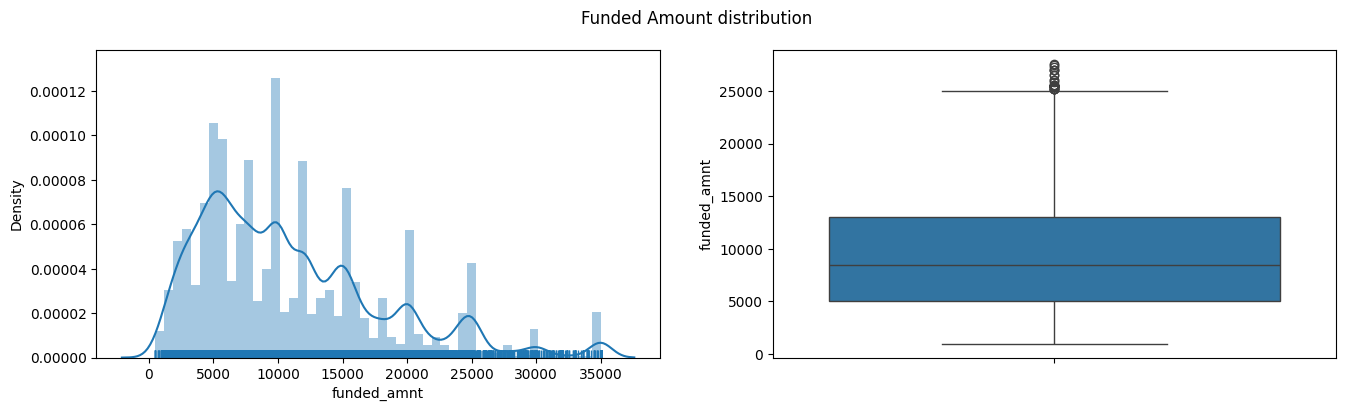

In [170]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df_clean.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

The range of funded amount is 500 to 35000. Most of funded amount is in the range of 5K to 14K

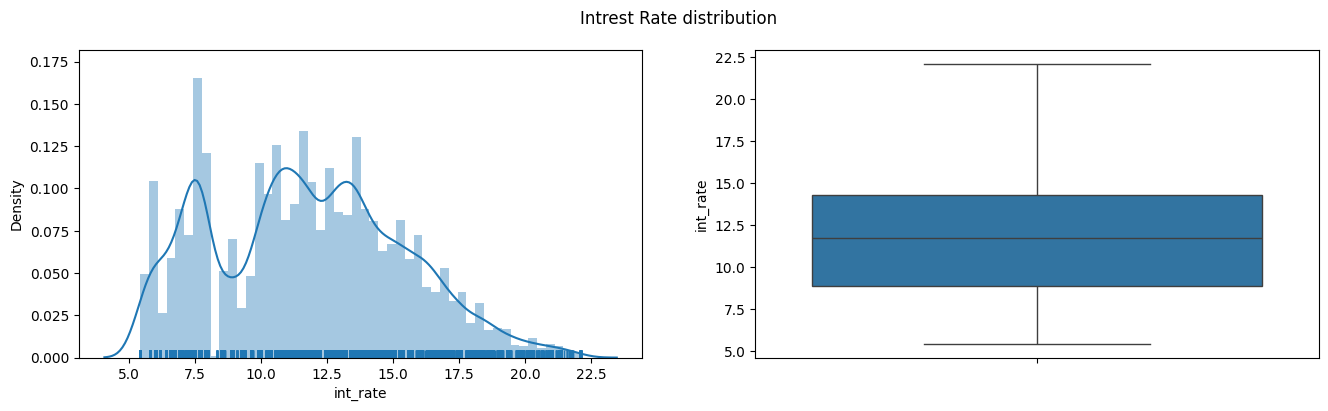

In [171]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df_clean.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df_clean.int_rate)
plt.suptitle('Intrest Rate distribution')
plt.show()

Maximum intrest rate is 24 and most of the intrest rates lies between 9 to 14%

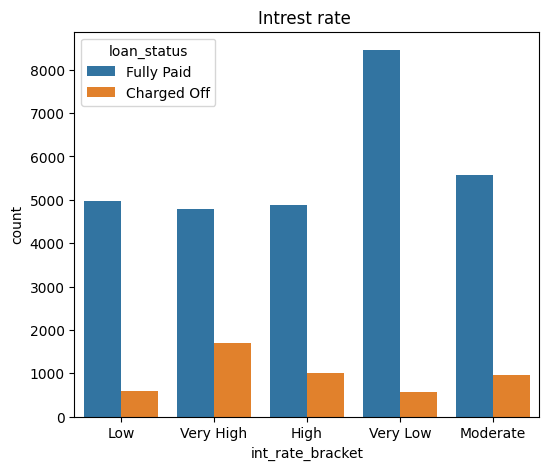

In [172]:
plt.figure(figsize=(6,5))
l = sns.countplot(x = 'int_rate_bracket', data = df_clean, hue = "loan_status")
l.set_title("Intrest rate ")
plt.show()

In [173]:
df_clean["int_rate_bracket"].describe()

count        33463
unique           5
top       Very Low
freq          9013
Name: int_rate_bracket, dtype: object

When the loan interest rate is high there is high chance of loan getting defaulted.

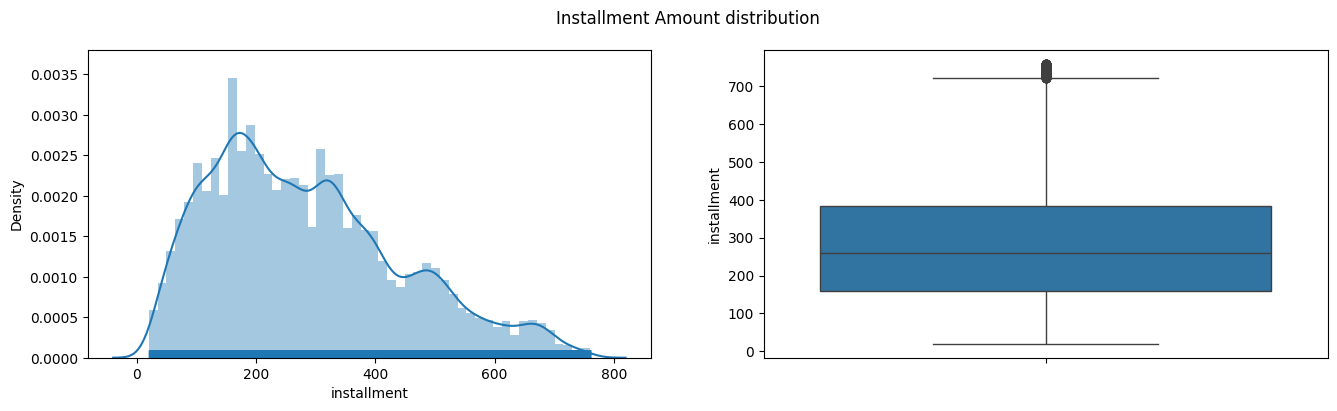

In [174]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df_clean.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df_clean.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

Most of the installments are in the range of 200 to 400 going at the max to 1305

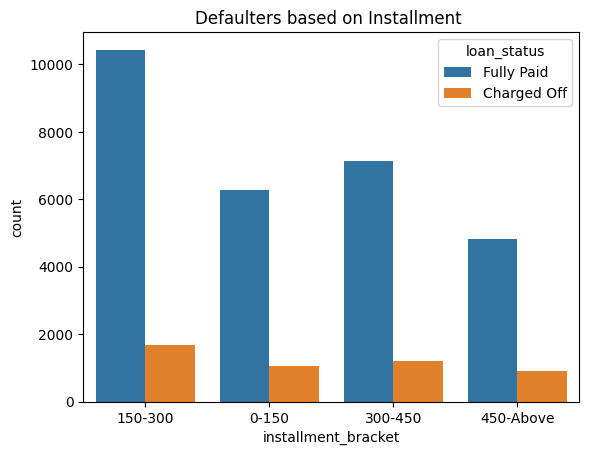

In [175]:
l = sns.countplot(x = 'installment_bracket', data = df_clean, hue = "loan_status")
l.set_title("Defaulters based on Installment ")
plt.show()

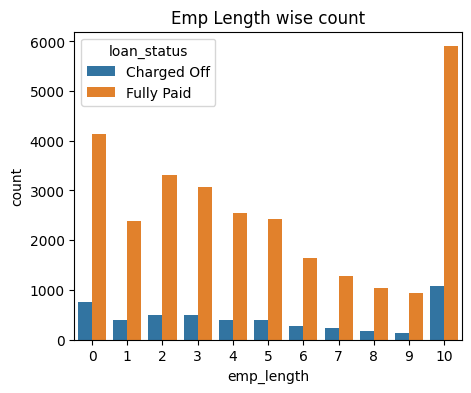

In [176]:
plt.figure(figsize=(5,4))
l = sns.countplot(x = 'emp_length', data = df_clean, hue = "loan_status")
l.set_title("Emp Length wise count")
plt.show()

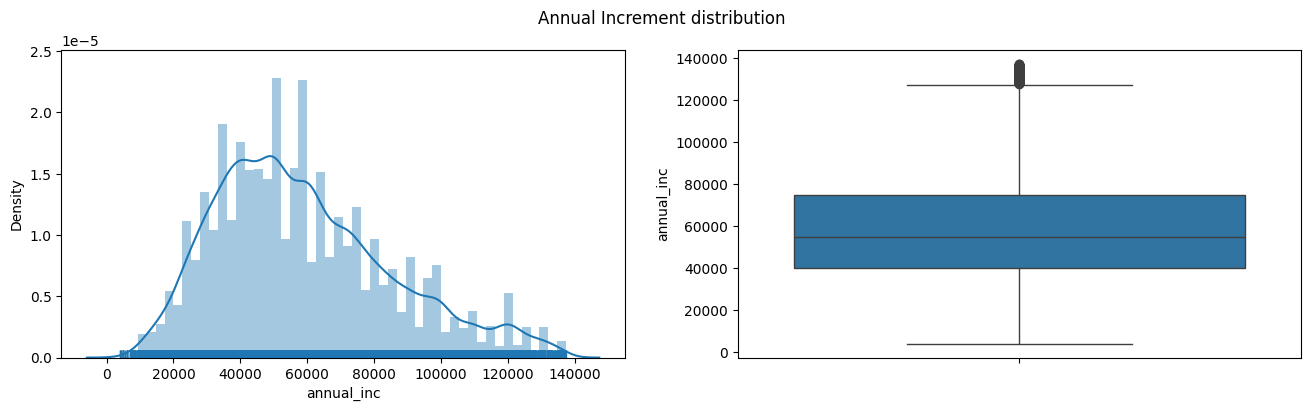

In [177]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df_clean.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df_clean.annual_inc)
plt.suptitle('Annual Increment distribution')
plt.show()

In [178]:
df_clean["term"].unique()

array([36, 60])

## Categorical Columns

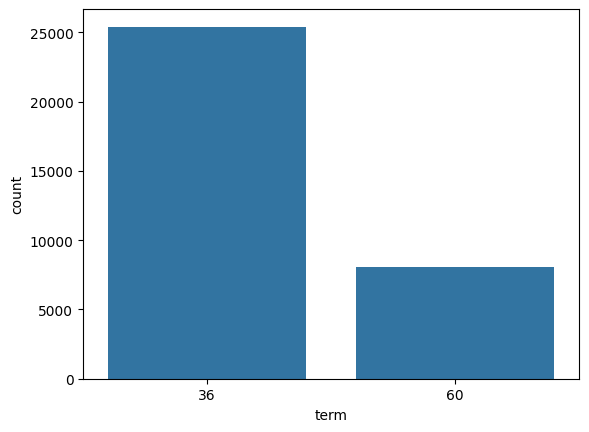

In [179]:
sns.countplot(data=df_clean,x="term")
plt.show()

# Majority of the loans are for term 36 months

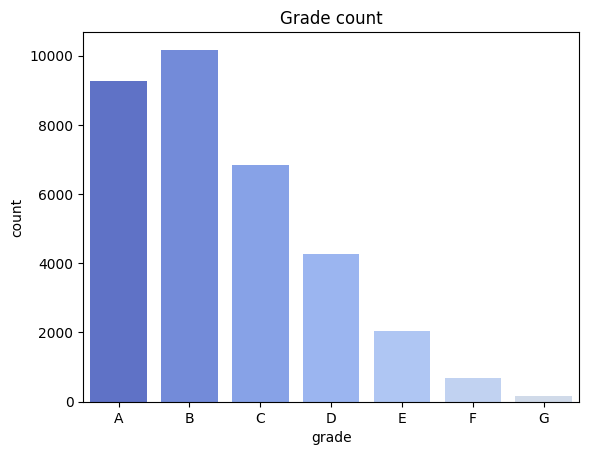

In [180]:
sns.countplot(data=df_clean,x="grade",order="ABCDEFG",palette=palette)
plt.title("Grade count")
plt.show()

#most of the Loan application fall under category B

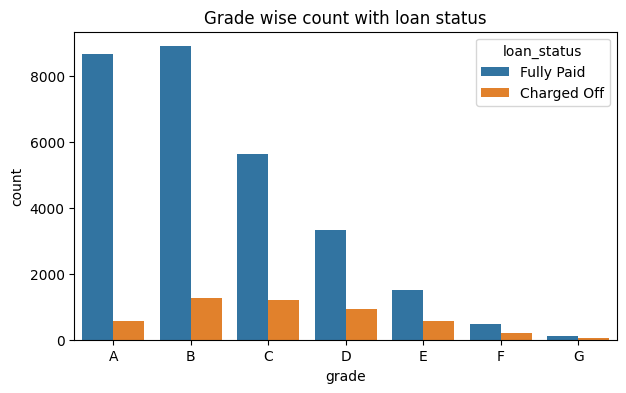

In [181]:
plt.figure(figsize=(7,4))
l = sns.countplot(x = 'grade', order =['A','B','C','D','E','F','G'], data = df_clean, hue = 'loan_status') 
plt.title("Grade wise count with loan status")
plt.show()

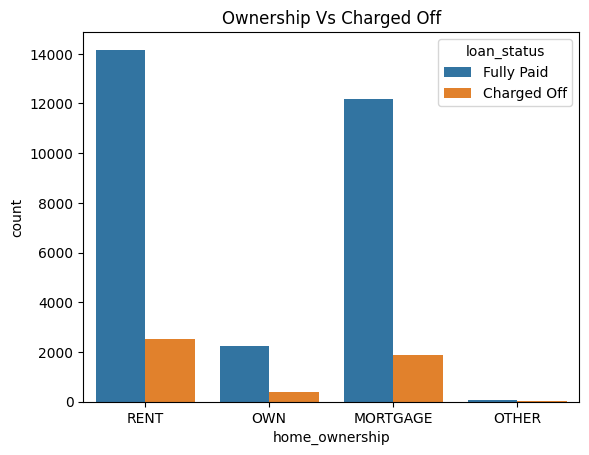

In [182]:
l = sns.countplot(x = 'home_ownership', data = df_clean, hue = "loan_status")
l.set_title("Ownership Vs Charged Off")
plt.show()

Majority of the rented and mortaged applicated are defaulters

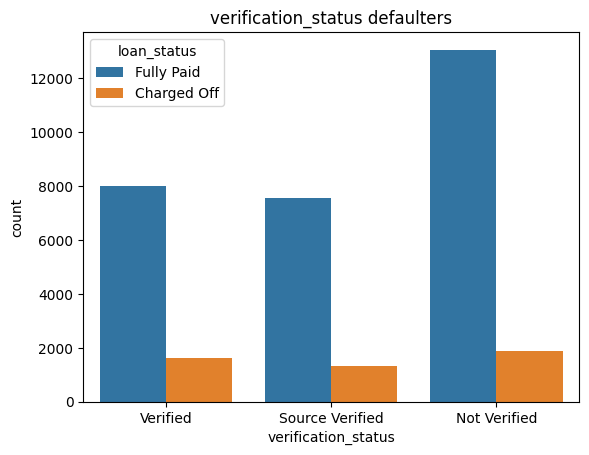

In [183]:
l = sns.countplot(x = 'verification_status', data = df_clean, hue = "loan_status")
l.set_title("verification_status defaulters")
plt.show()

More Not verified applicats are defaultors process needs to be audited

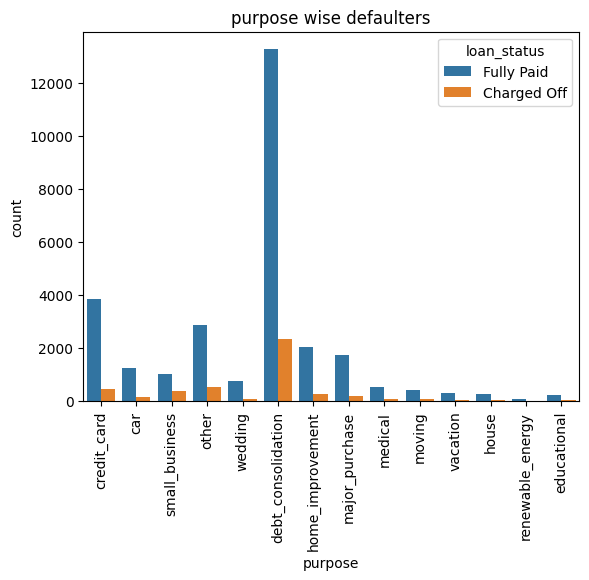

In [184]:
l = sns.countplot(x = 'purpose', data = df_clean, hue = "loan_status")
l.set_title("purpose wise defaulters")
plt.xticks(rotation = 90)
plt.show()

Most of the applicants are debt_consolidated and also the defaultors are more from debt consolidated

In [185]:
# List of tuples for year and quarter mappings
quarter_and_year_bucket = [
    (2008, "Q1", "Q1-2008"),
    (2008, "Q2", "Q2-2008"),
    (2008, "Q3", "Q3-2008"),
    (2008, "Q4", "Q4-2008"),
    (2009, "Q1", "Q1-2009"),
    (2009, "Q2", "Q2-2009"),
    (2009, "Q3", "Q3-2009"),
    (2009, "Q4", "Q4-2009"),
    (2010, "Q1", "Q1-2010"),
    (2010, "Q2", "Q2-2010"),
    (2010, "Q3", "Q3-2010"),
    (2010, "Q4", "Q4-2010"),
    (2011, "Q1", "Q1-2011"),
    (2011, "Q2", "Q2-2011"),
    (2011, "Q3", "Q3-2011"),
    (2011, "Q4", "Q4-2011")
]

# Function to assign quarter-year bucket based on year and quarter
def quarter_and_year_bucket_with_loop(year, quarter):
    for bucket in quarter_and_year_bucket:
        if (bucket[0] == year) and (bucket[1] == quarter):
            return bucket[2]
    return 'Unknown'  # For any quarter-year pair outside the defined ranges

# Apply the function to create the new column 'quarter_year_bracket'
df_clean['quarter_year_bracket'] = df_clean.apply(lambda x: quarter_and_year_bucket_with_loop(x.issue_y, x.issue_q), axis=1)

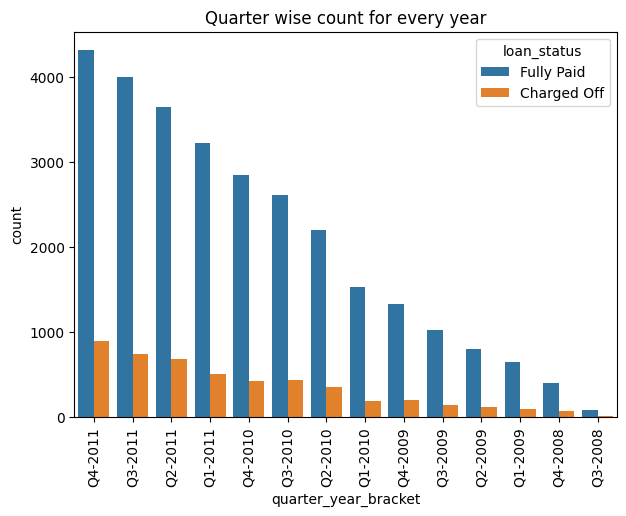

In [186]:
plt.figure(figsize=(7,5))
l = sns.countplot(x = 'quarter_year_bracket', data = df_clean, hue = "loan_status")
l.set_title("Quarter wise count for every year")
plt.xticks(rotation = 90)
plt.show()

As far as quarter gets increase charged off also for the customers also rising.

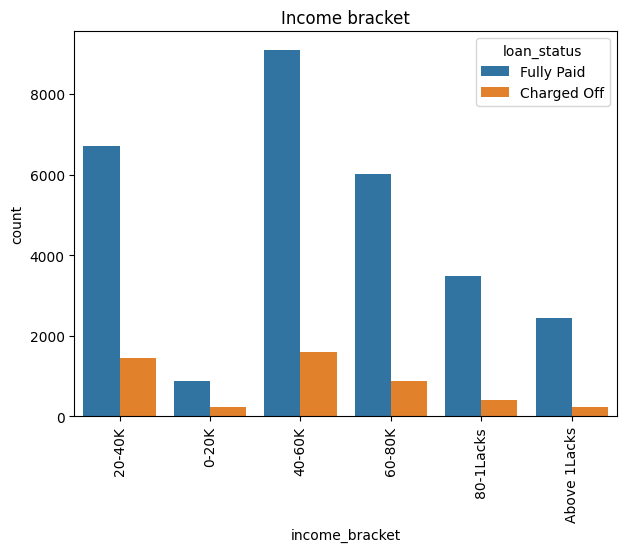

In [187]:
plt.figure(figsize=(7,5))
l = sns.countplot(x = 'income_bracket', data = df_clean, hue = "loan_status")
l.set_title("Income bracket")
plt.xticks(rotation = 90)
plt.show()

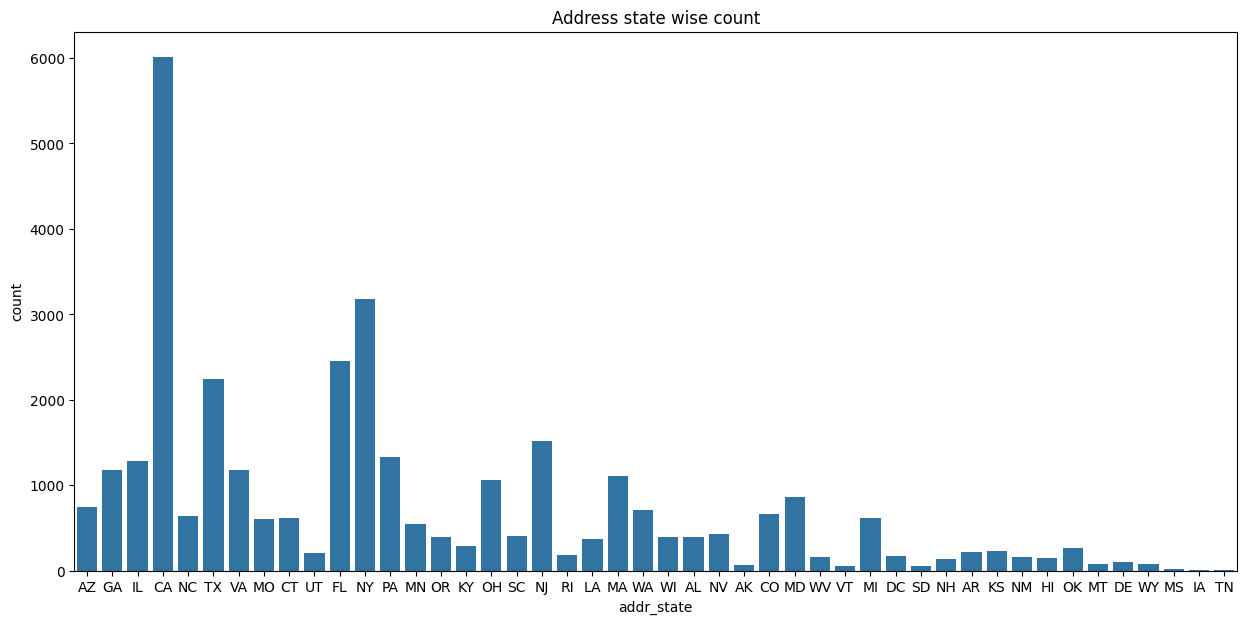

In [188]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_clean, x="addr_state")
plt.title("Address state wise count")
plt.show()

## Bivariate Analysis

In [189]:
income_bracket_count = df_clean.groupby(['income_bracket', 'loan_status']).loan_status.count().unstack()
income_bracket_count['Total'] = income_bracket_count['Charged Off']  + income_bracket_count['Fully Paid'] 
income_bracket_count['Chargedoff_Proportion'] = income_bracket_count['Charged Off'] / income_bracket_count['Total']

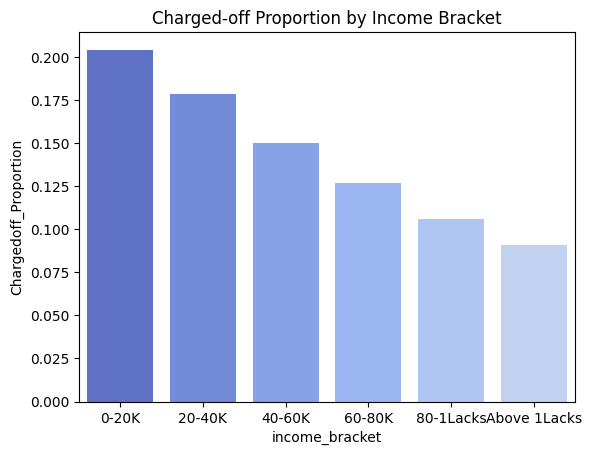

In [190]:
sns.barplot(data=income_bracket_count, 
            x="income_bracket", 
            y="Chargedoff_Proportion", 
            palette=palette)

plt.title("Charged-off Proportion by Income Bracket")
plt.show()
df=None

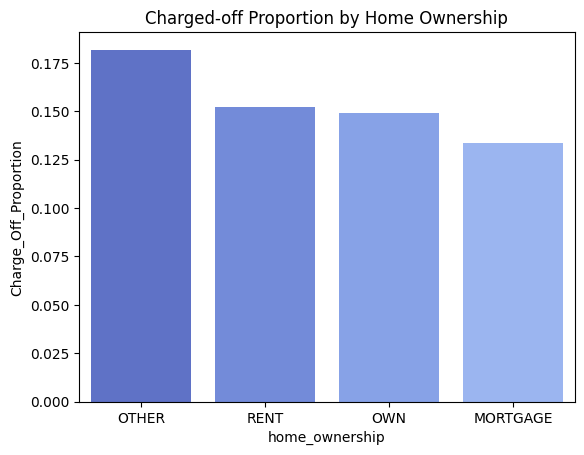

In [191]:
home_ownership_count = df_clean.groupby(["home_ownership","loan_status"])["loan_status"].count().unstack()
home_ownership_count["Total"] = home_ownership_count["Charged Off"] + home_ownership_count["Fully Paid"]
home_ownership_count["Charge_Off_Proportion"] = home_ownership_count["Charged Off"] / home_ownership_count["Total"]


home_ownership_count_sorted = home_ownership_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=home_ownership_count_sorted, x="home_ownership", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Home Ownership")
plt.show()

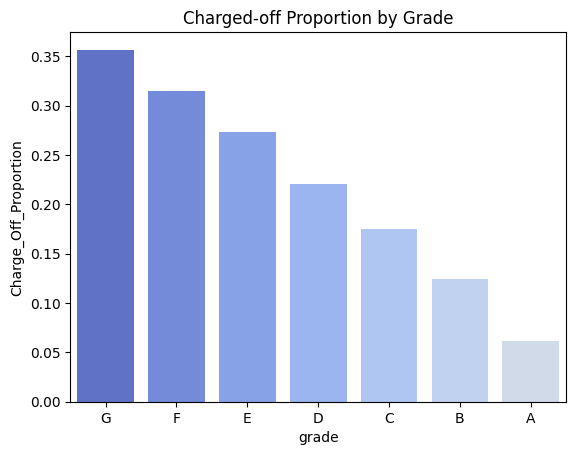

In [192]:
grade_count = df_clean.groupby(["grade","loan_status"])["loan_status"].count().unstack()
grade_count["Total"] = grade_count["Charged Off"] + grade_count["Fully Paid"]
grade_count["Charge_Off_Proportion"] = grade_count["Charged Off"] / grade_count["Total"]

grade_count_sorted = grade_count.sort_values("Charge_Off_Proportion", ascending=False)


sns.barplot(data=grade_count_sorted, x="grade", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Grade")
plt.show()

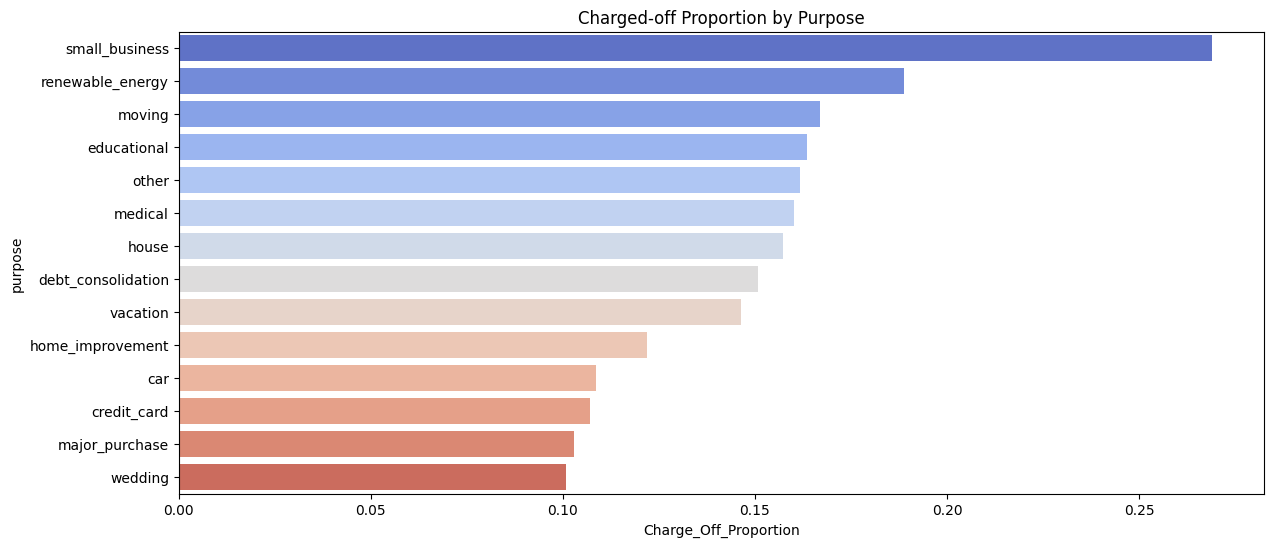

In [193]:
plt.figure(figsize=(14,6))
purpose_count = df_clean.groupby(["purpose","loan_status"])["loan_status"].count().unstack()
purpose_count["Total"] = purpose_count["Charged Off"] + purpose_count["Fully Paid"]
purpose_count["Charge_Off_Proportion"] = purpose_count["Charged Off"] / purpose_count["Total"]

purpose_count_sorted = purpose_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=purpose_count_sorted, y="purpose", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Purpose")
plt.show()

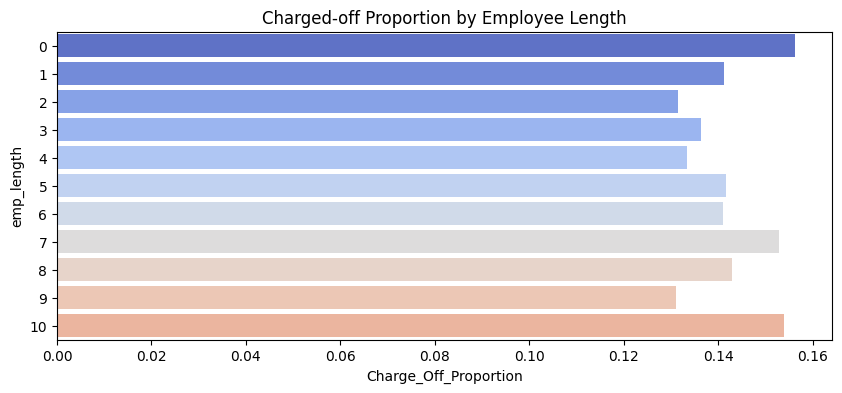

In [194]:
plt.figure(figsize=(10,4))
emp_length_count = df_clean.groupby(["emp_length","loan_status"])["loan_status"].count().unstack()
emp_length_count["Total"] = emp_length_count["Charged Off"] + emp_length_count["Fully Paid"]
emp_length_count["Charge_Off_Proportion"] = emp_length_count["Charged Off"] / emp_length_count["Total"]

emp_length_count_sorted = emp_length_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=emp_length_count_sorted, y="emp_length", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Employee Length")
plt.show()

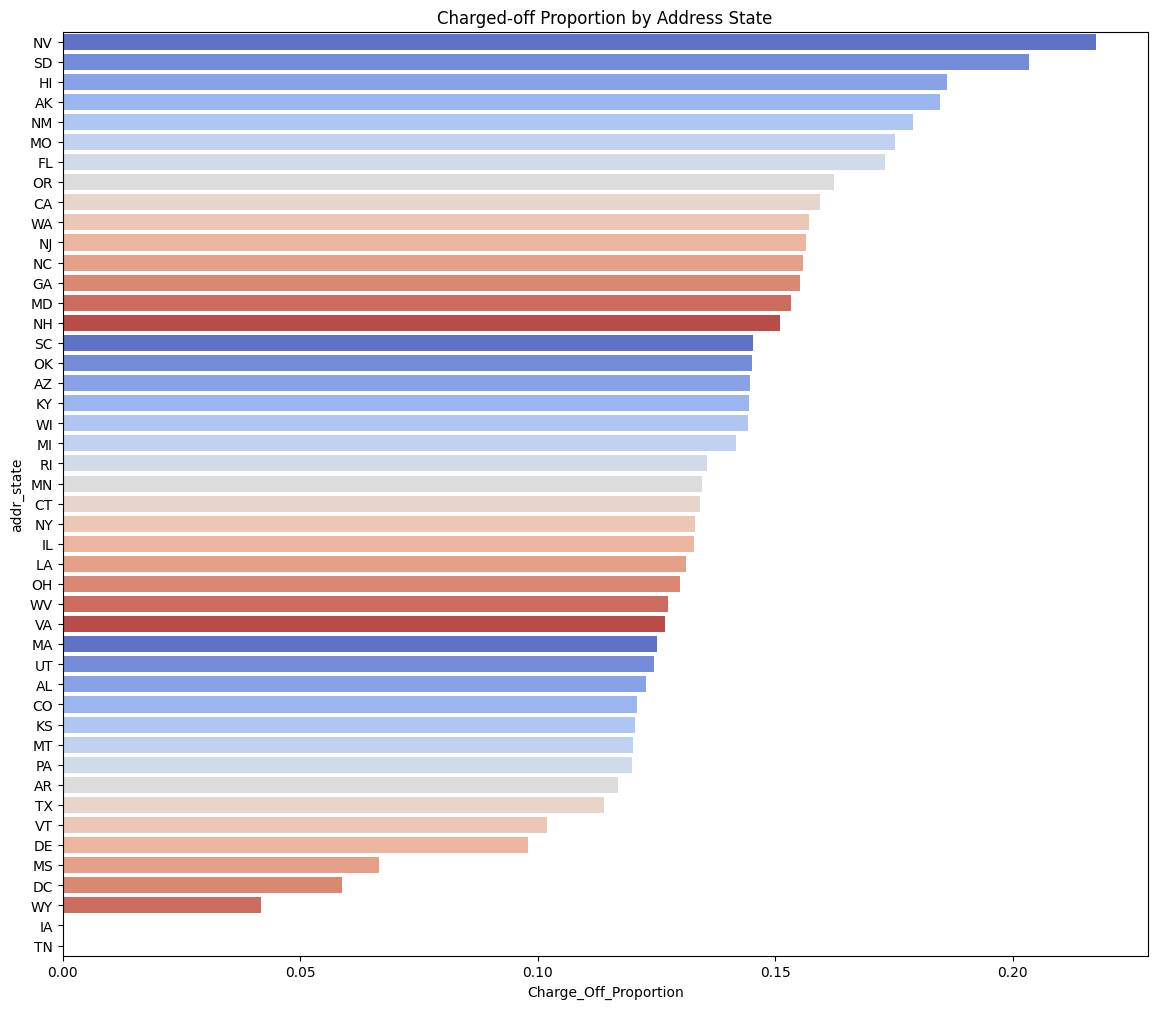

In [195]:
plt.figure(figsize=(14,12))
addr_state_count = df_clean.groupby(["addr_state","loan_status"])["loan_status"].count().unstack()
addr_state_count["Total"] = addr_state_count["Charged Off"] + addr_state_count["Fully Paid"]
addr_state_count["Charge_Off_Proportion"] = addr_state_count["Charged Off"] / addr_state_count["Total"]

addr_state_count_sorted = addr_state_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=addr_state_count_sorted, y="addr_state", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Address State")
plt.show()

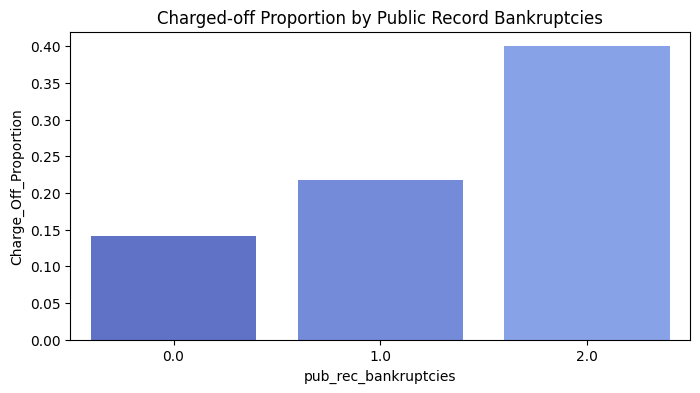

In [196]:
plt.figure(figsize=(8,4))
pub_rec_bankruptcies_count = df_clean.groupby(["pub_rec_bankruptcies","loan_status"])["loan_status"].count().unstack()
pub_rec_bankruptcies_count["Total"] = pub_rec_bankruptcies_count["Charged Off"] + pub_rec_bankruptcies_count["Fully Paid"]
pub_rec_bankruptcies_count["Charge_Off_Proportion"] = pub_rec_bankruptcies_count["Charged Off"] / pub_rec_bankruptcies_count["Total"]

pub_rec_bankruptcies_count_sorted = pub_rec_bankruptcies_count.sort_values("Charge_Off_Proportion", ascending=False)


sns.barplot(data=pub_rec_bankruptcies_count_sorted, x="pub_rec_bankruptcies", y="Charge_Off_Proportion",palette=palette,orient="v")
plt.title("Charged-off Proportion by Public Record Bankruptcies")
plt.show()

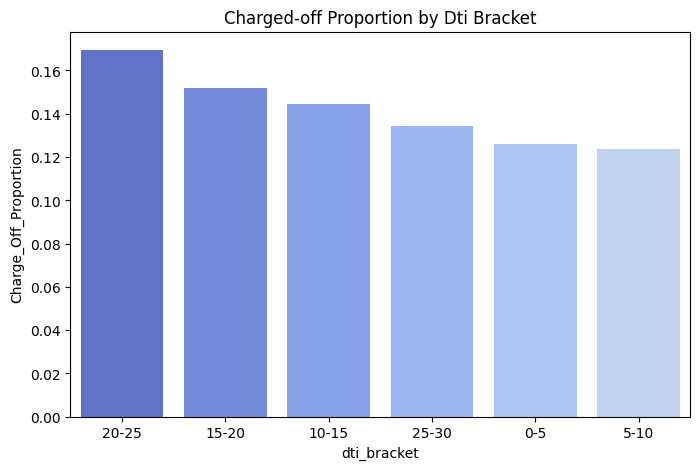

In [197]:
df_clean["dti_bracket"] = df_clean["dti"].apply(debt_to_inc_ration_to_bracket)
plt.figure(figsize=(8,5))
dti_bracket_count = df_clean.groupby(["dti_bracket","loan_status"])["loan_status"].count().unstack()
dti_bracket_count["Total"] = dti_bracket_count["Charged Off"] + dti_bracket_count["Fully Paid"]
dti_bracket_count["Charge_Off_Proportion"] = dti_bracket_count["Charged Off"] / dti_bracket_count["Total"]

dti_bracket_count_sorted = dti_bracket_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=dti_bracket_count_sorted, x="dti_bracket", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Dti Bracket")
plt.show()

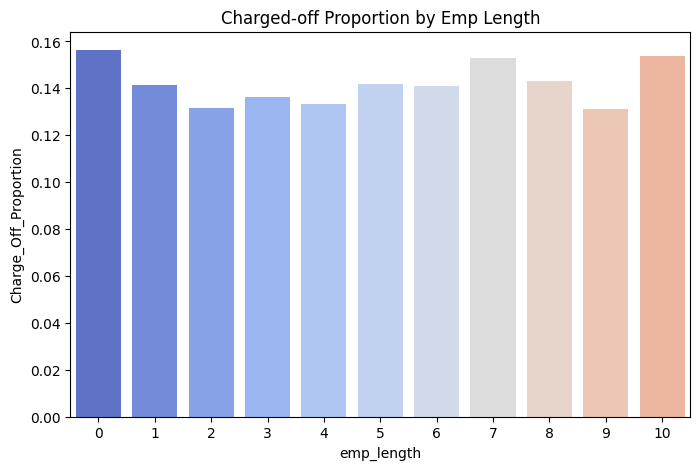

In [198]:
plt.figure(figsize=(8,5))
emp_length_count = df_clean.groupby(["emp_length","loan_status"])["loan_status"].count().unstack()
emp_length_count["Total"] = emp_length_count["Charged Off"] + emp_length_count["Fully Paid"]
emp_length_count["Charge_Off_Proportion"] = emp_length_count["Charged Off"] / emp_length_count["Total"]

emp_length_count_sorted = emp_length_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=emp_length_count_sorted, x="emp_length", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Emp Length")
plt.show()

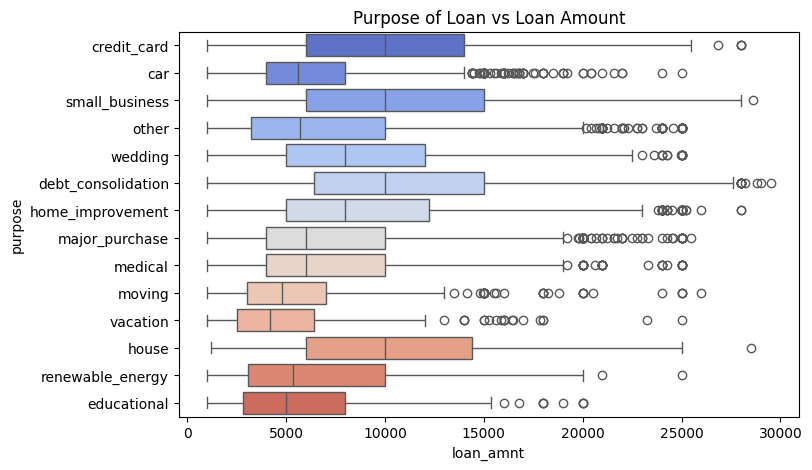

In [199]:
plt.figure(figsize=(8,5))
sns.boxplot(y='purpose', x='loan_amnt', data =df_clean,palette=palette)
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

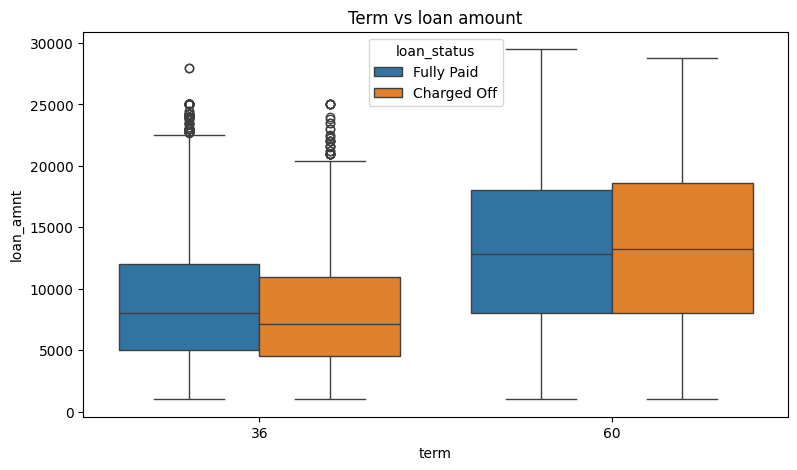

In [200]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df_clean)
plt.title('Term vs loan amount')
plt.show()

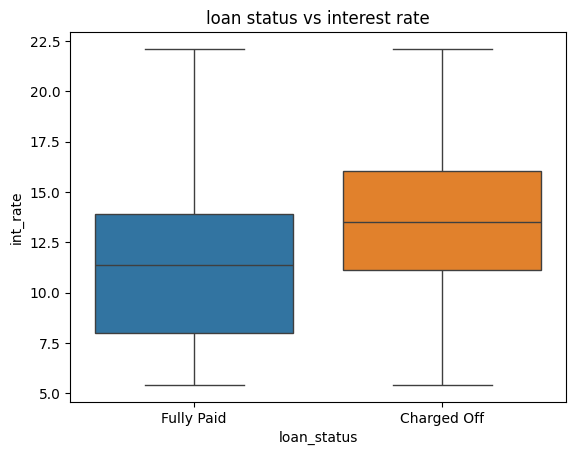

In [201]:
sns.boxplot(x='loan_status', y='int_rate', data=df_clean, hue="loan_status")
plt.title('loan status vs interest rate')
plt.show()

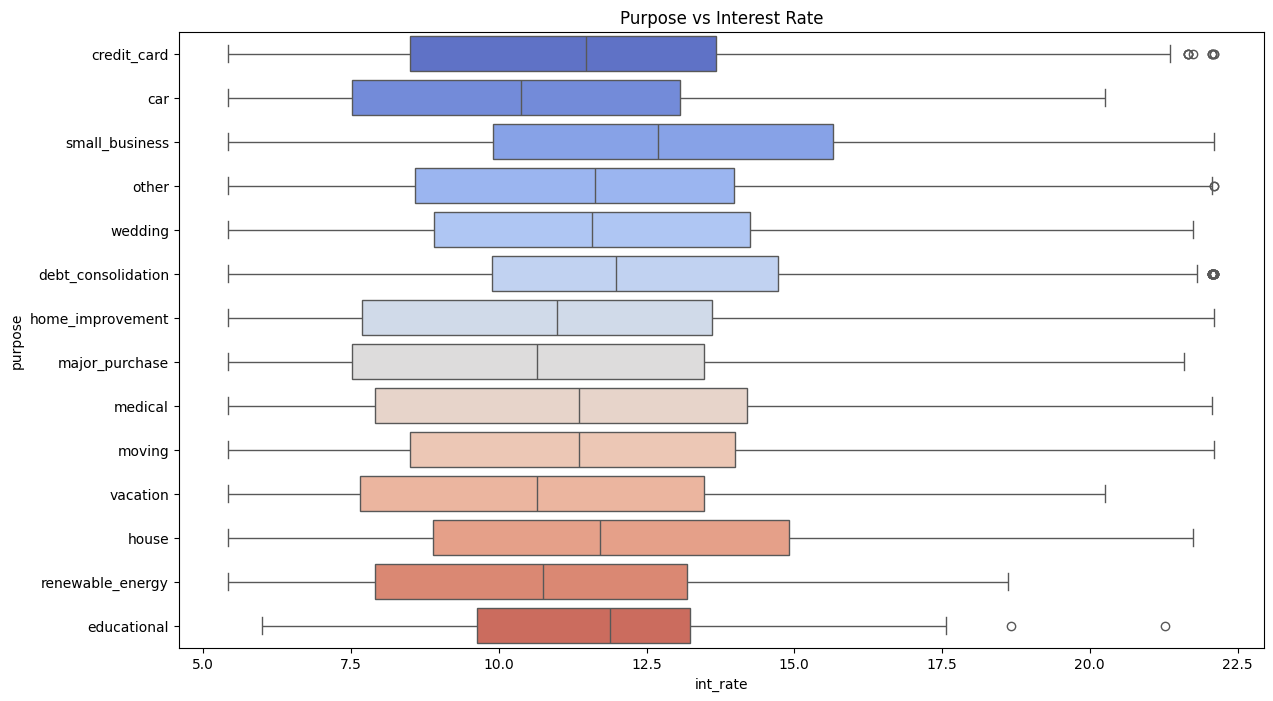

In [202]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_clean,y="purpose", x="int_rate",orient="h",palette=palette)
plt.title("Purpose vs Interest Rate")
plt.show()

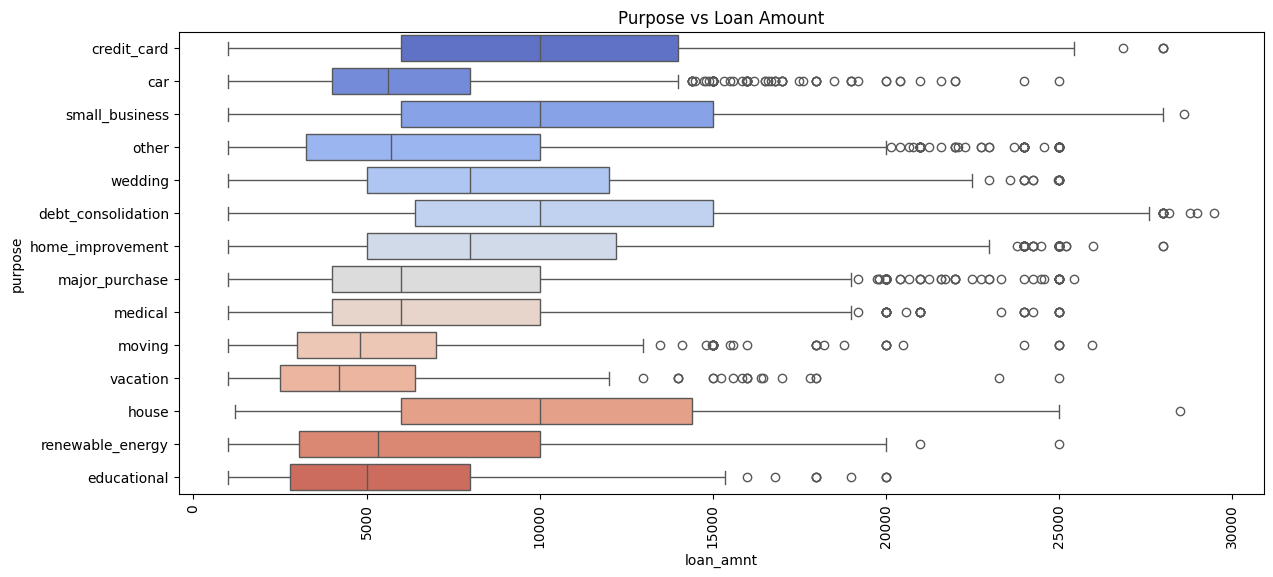

In [203]:
plt.figure(figsize=(14,6))
sns.boxplot(y="purpose", x="loan_amnt",orient="h", data=df_clean,palette=palette)
plt.title("Purpose vs Loan Amount")
plt.xticks(rotation=90)
plt.show()

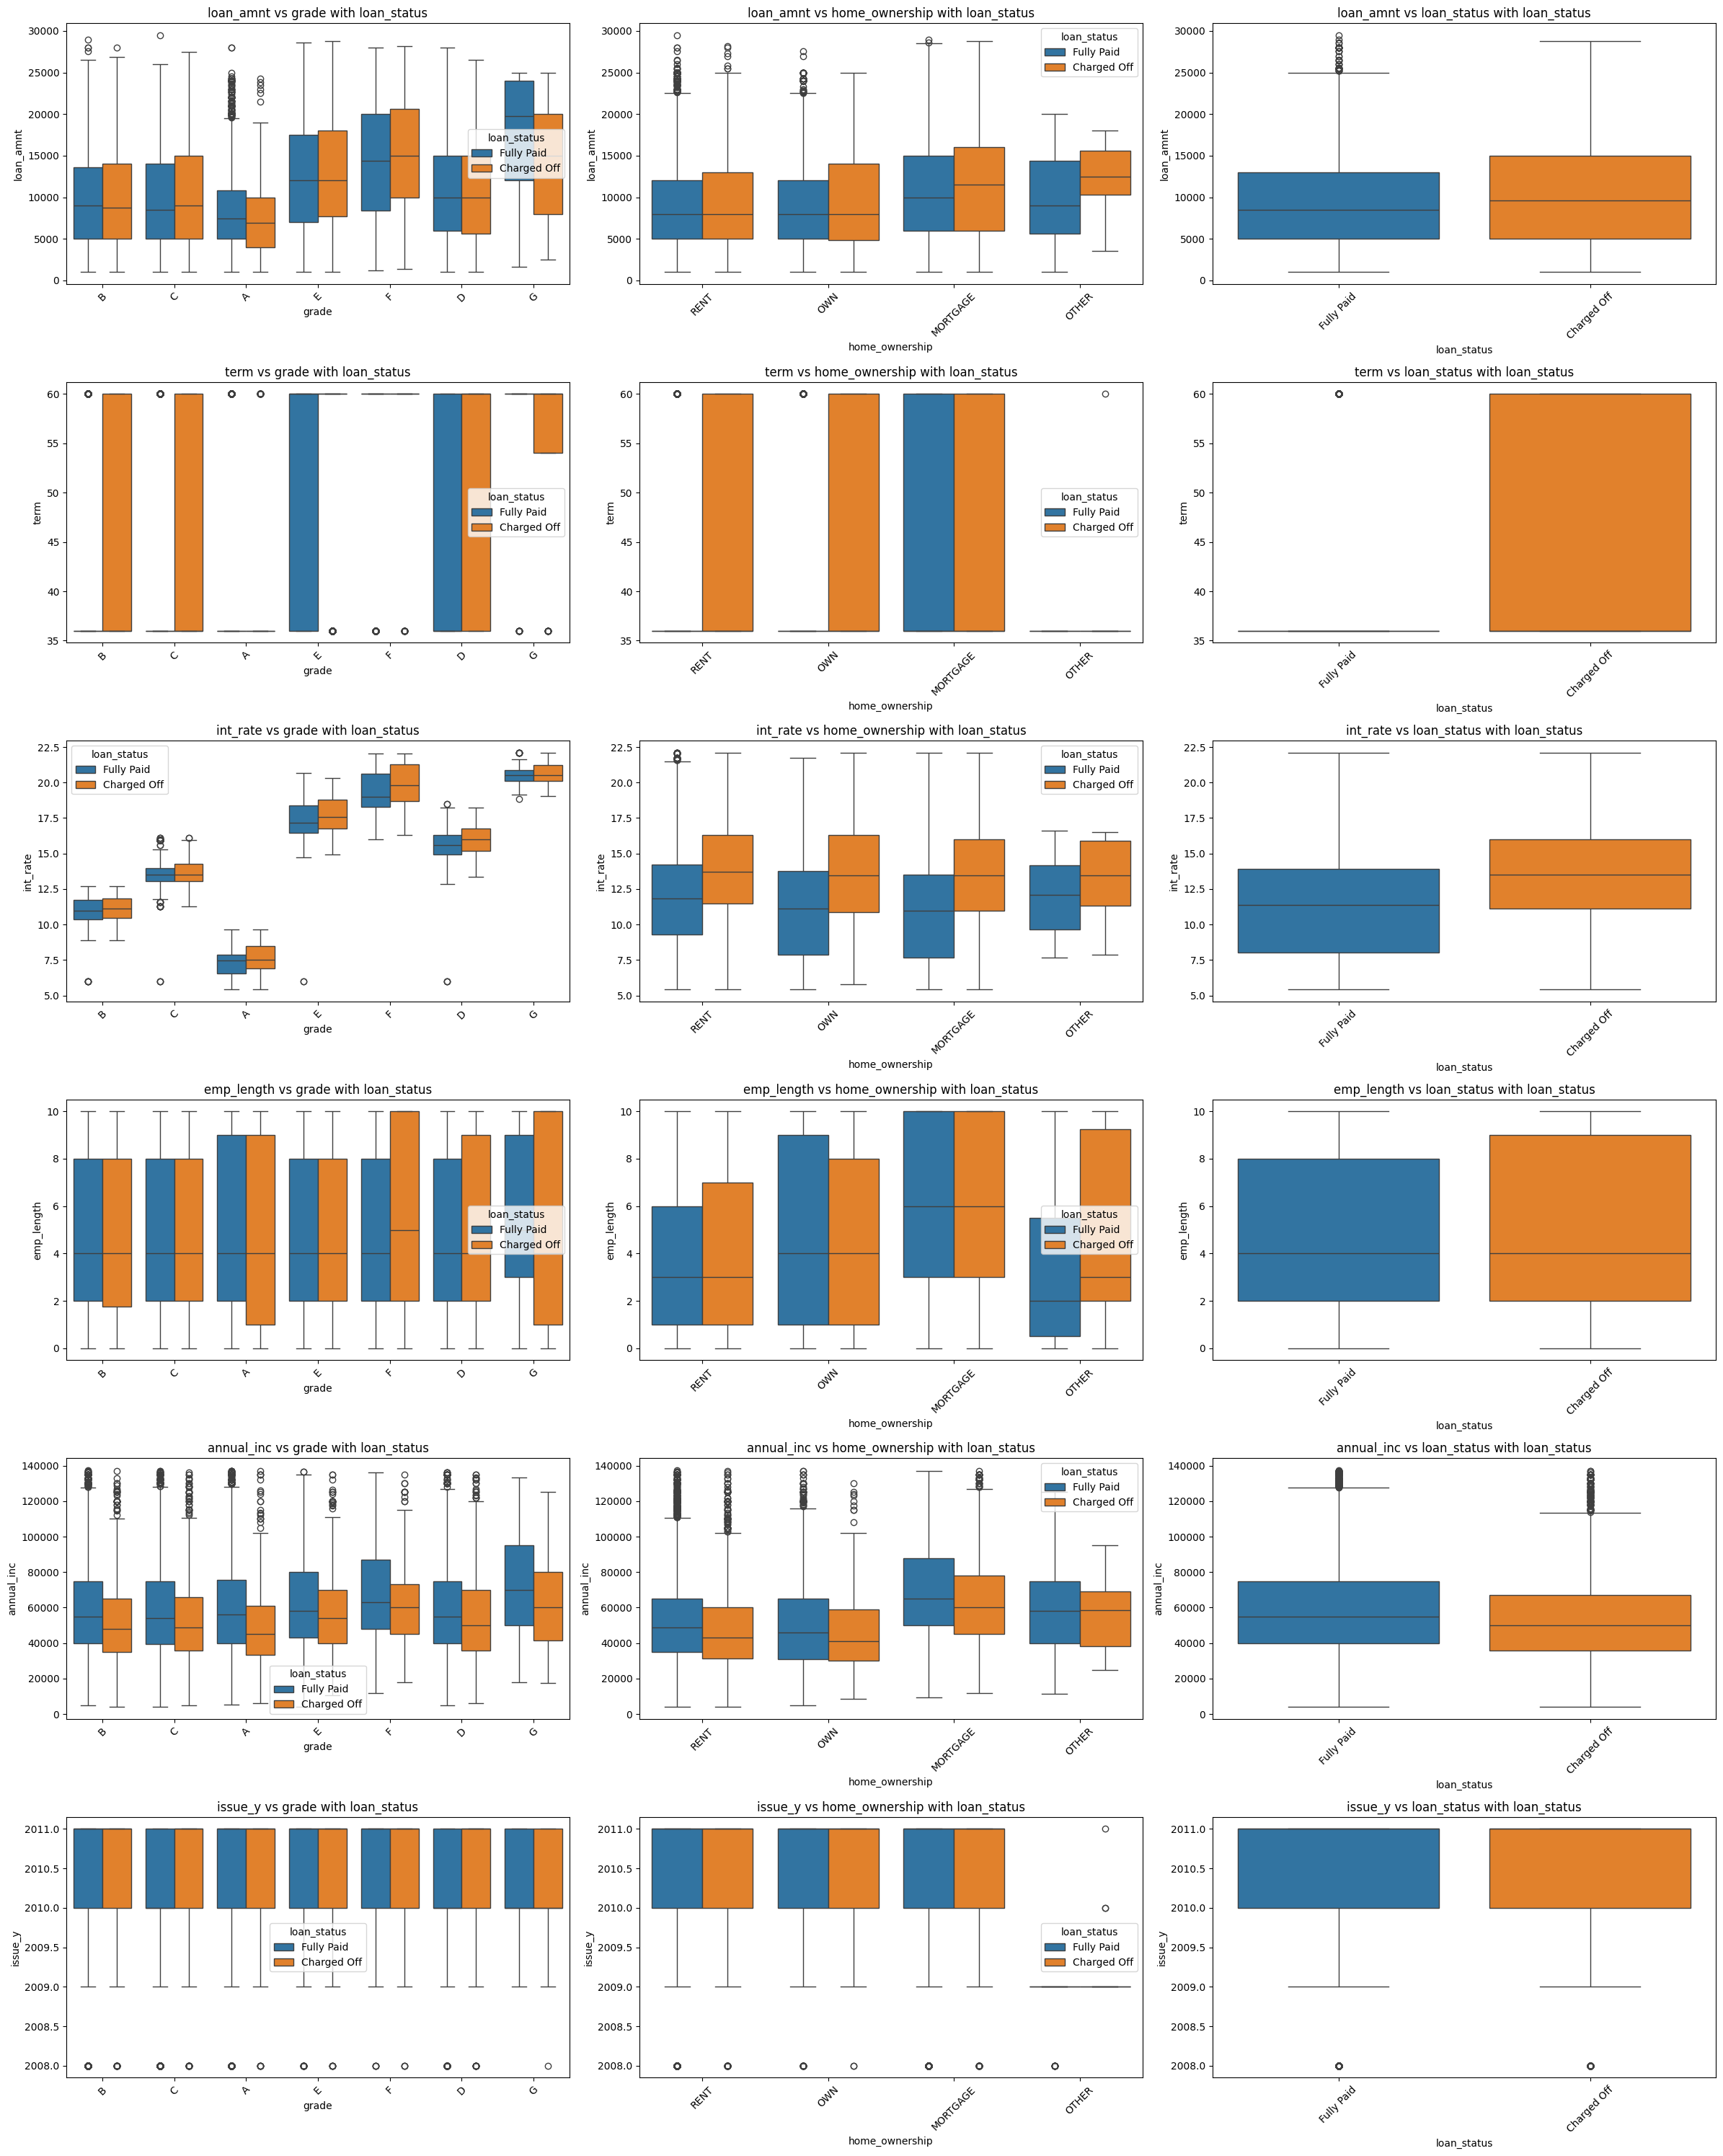

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["loan_amnt", "term", "int_rate", "emp_length", "annual_inc", "issue_y"]
cat_cols = ["grade", "home_ownership", "loan_status"]
hue_col = 'loan_status'  # You can change this to any column you want for hue

# Define number of rows and columns for subplots grid
rows = len(num_cols)
cols = len(cat_cols)

# Create subplots with the defined grid size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))

# Loop over the numerical and categorical columns
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.boxplot(x=df_clean[cat], y=df_clean[num], hue=df_clean[hue_col], ax=axes[i, j])  # Create boxplot with hue
        axes[i, j].set_title(f'{num} vs {cat} with {hue_col}')
        axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

In [205]:
df_clean["loan_status_num"]=df_clean["loan_status"].apply(lambda x: 0 if x=="Charged Off" else 1)

## Corelation Matrix

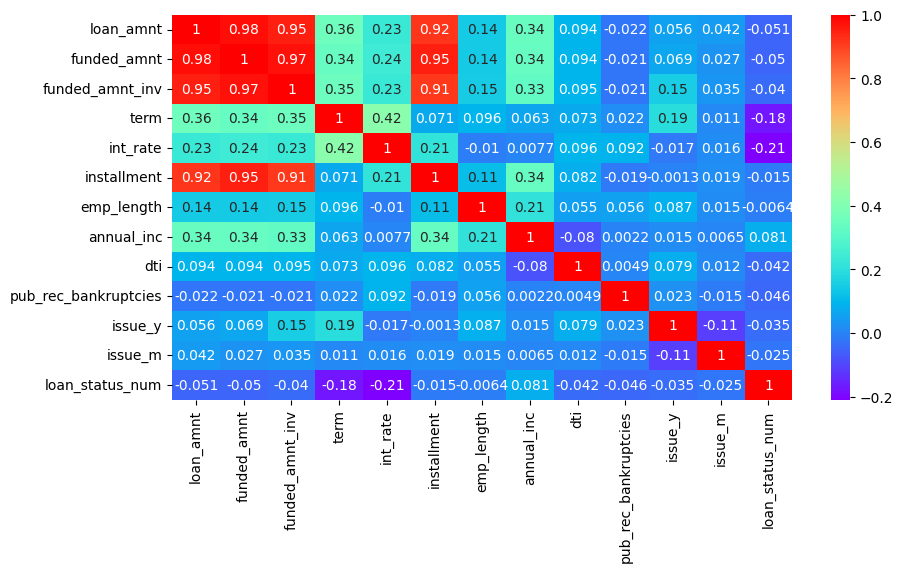

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of numerical columns
num_col = [] 

for col in df_clean.columns:
    if((df_clean[col].dtype == "int32") or (df_clean[col].dtype == "int64") or (df_clean[col].dtype == "float32") or (df_clean[col].dtype == "float64") ):
        num_col.append(col)

fig=plt.figure(figsize=(10,5))
sns.heatmap(df_clean[num_col].corr(),annot=True,cmap="rainbow")
plt.show()